In [16]:
with open('The Adventures of Sherlock Holmes.txt', 'r',encoding="utf8") as file:
  file_contents = file.read()

In [17]:
def remove_n(text):
    return text.replace("\n"," ")
remove_n(file_contents)

'  I. A SCANDAL IN BOHEMIA   I.  To Sherlock Holmes she is always _the_ woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer excellent for drawing the veil from men’s motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# nltk.download('punkt')
# nltk.download('stopwords')

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation and special characters
    tokens = [word for word in tokens if word.isalnum()]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # print(tokens)
    print(len(tokens))
    return tokens

preprocessed_text = preprocess_text(file_contents)

44224


In [7]:
# %pip install spacy 


  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.3.4-py3-none-any.whl.metadata (4.7 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached pydantic-2.5.1-py3-none-any.whl.metadata (64 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached confection-0.1.3-py3-none-any.whl.metadata (19 kB)
  Using cached cloudpathlib-0.16.0-py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/12.1 MB 8.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/12.1 MB 10.1 MB/s eta 0:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [10]:
# !python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.2/12.8 MB 9.0 MB/s eta 0:00:02
     - -------------------------------------- 0.6/12.8 MB 8.6 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/12.8 MB 8.8 MB/s eta 0:00:02
     ---- ----------------------------------- 1.6/12.8 MB 9.2 MB/s eta 0:00:02
     ------ --------------------------------- 2.0/12.8 MB 8.9 MB/s eta 0:00:02
     ------ --------------------------------- 2.2/12.8 MB 9.3 MB/s eta 0:00:02
     ------ --------------------------------- 2.2/12.8 MB 9.3 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 7.4 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 7.7 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 7.8 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 8.0 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 7

In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(file_contents)
names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
print(names)

['Irene Adler', 'Irene\nAdler', 'Holmes', 'Holmes', 'Odessa', 'Trepoff', 'Atkinson', 'Holmes', 'Watson', 'Watson', 'Holmes', 'Mary\nJane', 'Holmes', 'Holmes', 'Wallenstein', 'Bohemia', 'Watson', 'Holmes', 'Holmes', 'Holmes', 'Watson', 'Von Kramm', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Wilhelm Gottsreich Sigismond', 'von\nOrmstein', 'Bohemia', 'Holmes', 'Irene Adler', 'Holmes', 'Holmes', 'Contralto', 'La Scala', 'Holmes', 'von Saxe-Meningen', 'the King of\nScandinavia', 'Irene Adler', 'Holmes', 'Langham', 'Von Kramm', 'Holmes', 'Holmes', 'Majesty', 'Watson', 'Holmes', 'Irene Adler', 'Briony Lodge', 'Miss Adler', 'Irene Adler', 'Godfrey\nNorton', 'Briony Lodge', 'John', 'Watson', 'Monica', 'Godfrey Norton', 'Irene Adler', 'Turner', 'Irene', 'John Hare', 'Holmes', 'Holmes', 'Godfrey Norton', 'Pshaw', 'Holmes', 'Irene\nAdler', 'Briony Lodge', 'Holmes', 'Holmes', 'Holmes', 'Holmes', 'Arnsworth Castle', 'Majesty', 'Sherlock Holmes', 'Holmes', 'Sherlock Holmes', 'Briony Lodge', '

In [63]:
unique_list = list(set(names))
print(len(unique_list))

277


In [65]:
list_joined = [''.join(word.split()) for word in unique_list]

In [67]:
fin=list(set(list_joined))
print(len(fin))

262


In [ ]:
#second name
#'s
#

In [70]:
print(list_joined)

['InspectorBradstreet', 'thisJohnOpenshaw', 'SherlockHolmes', 'Thumb', 'CatherineCusack', 'Standard', 'Sutherland', 'JohnHorner', 'Ferguson', 'I.“', 'FrancisHayMoulton', 'Edward', 'Square', 'Wilton', 'AloysiusDoran', 'Baker', 'Camberwell', 'affairedecœur', 'HenryBakers', 'Langham', 'HattyDoran', 'Calhoun', 'LadyAliciaWhittington', 'Frank', 'YoungMcCarthy', 'Oakshott', 'Joseph', 'Gravesend', 'St.Simon', 'Breckinridge', 'McQuire', 'Angel', 'HonoriaWestphail', 'I.', 'McCauley', 'WilliamCrowder', 'SwandamLane', 'Countess', 'CatherineCusack', 'Turner', 'GrimesbyRoylott', 'bush', 'Backwater', 'Wallenstein', 'JohnSwain', 'JohnTurner', 'CharlesMcCarthy', 'Doran', 'MissHunter', 'JohnHare', 'PeterJones', 'SophyAnderson', 'Eustace', 'Elias', 'LyonPlace', 'Stark', 'JohnRobinson', 'Windibank', 'Holmes', 'Trepoff', 'Winchester', 'VincentSpaulding', 'MaryHolder', 'Pshaw', 'McFarlane', 'JamesRyder', 'StokeMoran', 'Fordham', 'EliasWhitney', 'ArthurConanDoyleContents', 'Dundas', 'Ned', 'Surrey', 'HelenS

In [18]:
from collections import defaultdict
from itertools import combinations

def find_co_occurrence(text, characters, window_size):
    # Convert characters to lowercase for case-insensitive comparison
    characters = [char.lower() for char in characters]

    # Create a dictionary to store co-occurrence counts
    co_occurrence = defaultdict(int)

    # Slide a window through the text
    for i in range(len(text)):
        start = max(0, i - window_size)
        end = min(len(text), i + window_size + 1)

        window = text[start:end]

        # Get combinations of characters within the window
        for char1, char2 in combinations(window, 2):
            if char1.lower() in characters and char2.lower() in characters:
                co_occurrence[(char1.lower(), char2.lower())] += 1
                co_occurrence[(char2.lower(), char1.lower())] += 1  # Considering symmetry

    return co_occurrence

In [19]:
co_occurrence_result = find_co_occurrence(preprocessed_text, list_joined, window_size=6)

In [20]:
for pair, count in co_occurrence_result.items():
  if count >= 300:
    print(pair, ':', count)

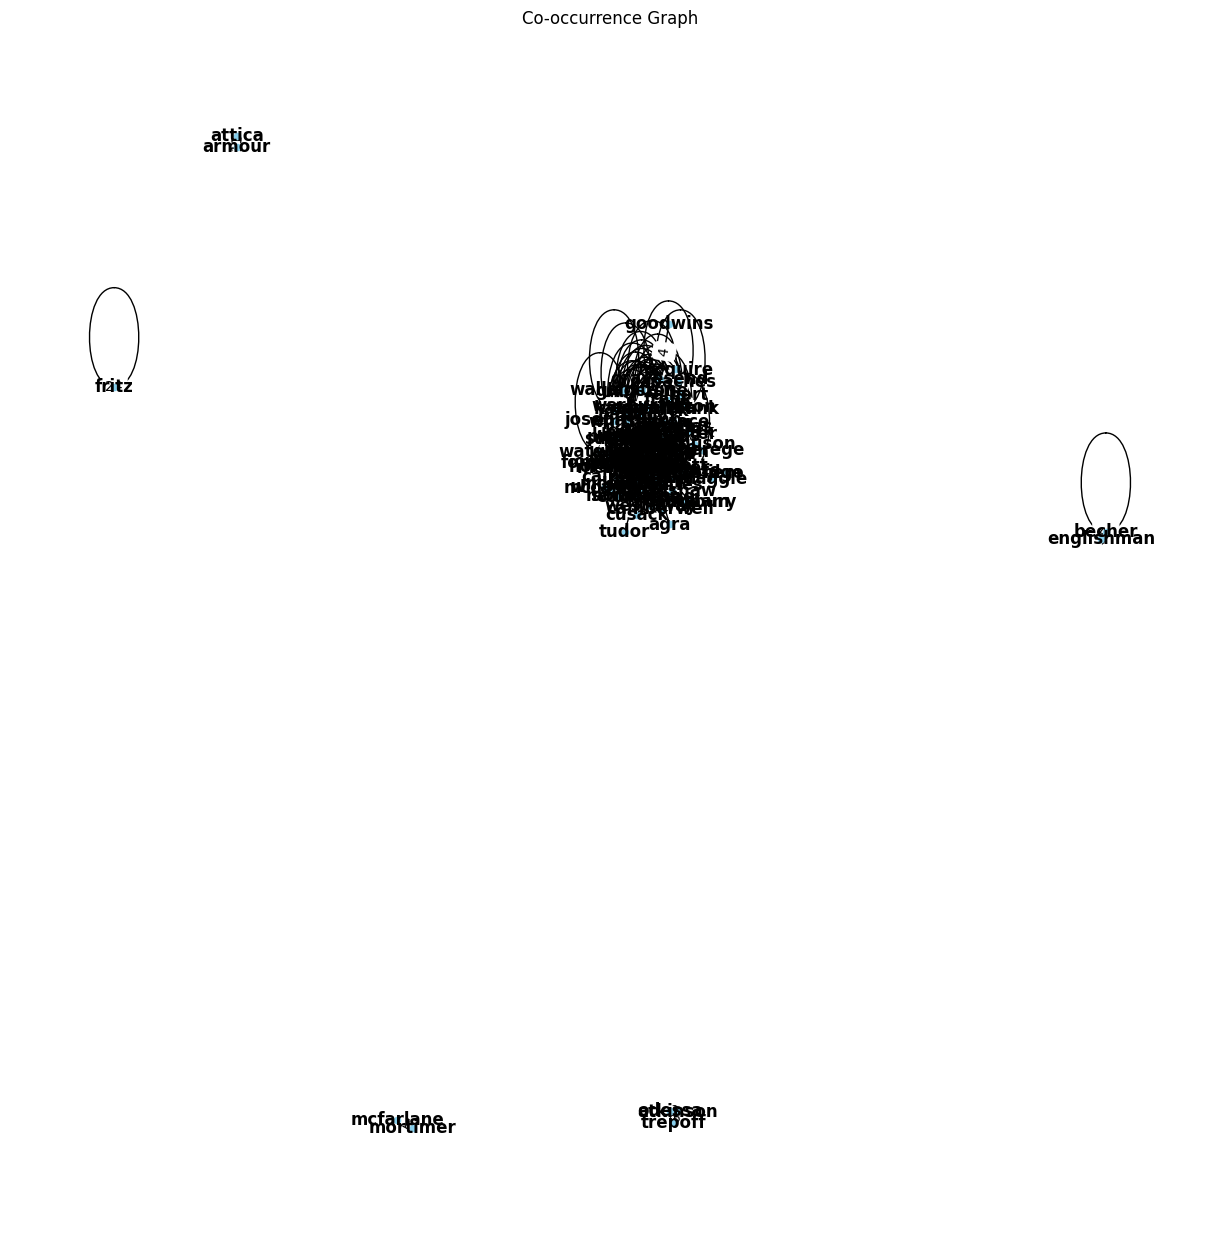

In [23]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()

for pair,count in co_occurrence_result.items():
  G.add_edge(pair[0], pair[1], weight = count)

pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=20, node_color='skyblue', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Co-occurrence Graph')
plt.show()

In [24]:
number_of_nodes = G.number_of_nodes()
number_of_nodes

125

In [27]:
protagonists= ["Sherlock Holmes","John H. Watson" , "Inspector G. Lestrade","The King of Bohemia","Irene Adler","Jabez Wilson","Miss Mary Sutherland","Charles McCarthy","James McCarthy","Alice McCarthy",
              "John Turner","John Openshaw","Neville St. Clair","Helen Stoner","Victor Hatherly","Violet Hunter"]

subgraph_nodes = [node for node in imp_characters if node.lower() in G.nodes()]
G = G.subgraph(subgraph_nodes)

In [28]:
degree_centrality = nx.degree_centrality(G)

for character in protagonists:
    if character.lower() in degree_centrality:
        print(f"{character}: Degree Centrality = {degree_centrality[character.lower()]}")
    else:
        print(f"{character}: Degree Centrality = 0 (Character not found in the co-occurrence graph)")

Sherlock Holmes: Degree Centrality = 0 (Character not found in the co-occurrence graph)
John H. Watson: Degree Centrality = 0 (Character not found in the co-occurrence graph)
Inspector G. Lestrade: Degree Centrality = 0 (Character not found in the co-occurrence graph)
The King of Bohemia: Degree Centrality = 0 (Character not found in the co-occurrence graph)
Irene Adler: Degree Centrality = 0 (Character not found in the co-occurrence graph)
Jabez Wilson: Degree Centrality = 0 (Character not found in the co-occurrence graph)
Miss Mary Sutherland: Degree Centrality = 0 (Character not found in the co-occurrence graph)
Charles McCarthy: Degree Centrality = 0 (Character not found in the co-occurrence graph)
James McCarthy: Degree Centrality = 0 (Character not found in the co-occurrence graph)
Alice McCarthy: Degree Centrality = 0 (Character not found in the co-occurrence graph)
John Turner: Degree Centrality = 0 (Character not found in the co-occurrence graph)
John Openshaw: Degree Centrali

In [ ]:
from networkx.algorithms.bipartite.centrality import betweenness_centrality
betw = nx.betweenness_centrality(G)

for character in protagonists:
    if character.lower() in betw:
        print(f"{character}: Betweenness Centrality = {betw[character.lower()]}")
    else:
        print(f"{character}: Betweenness Centrality = 0 (Character not found in the co-occurrence graph)")

helen: Betweenness Centrality = 0.023809523809523808
henry: Betweenness Centrality = 0.0
stephen: Betweenness Centrality = 0.04761904761904761
mother: Betweenness Centrality = 0.09523809523809523
knapp: Betweenness Centrality = 0.023809523809523808
teddy: Betweenness Centrality = 0.0
lester: Betweenness Centrality = 0.09523809523809523
flynn: Betweenness Centrality = 0.0


In [ ]:
closeness_centrality = nx.closeness_centrality(G)

for character in protagonists:
    if character.lower() in betw:
        print(f"{character}: Closeness Centrality = {closeness_centrality[character.lower()]}")
    else:
        print(f"{character}: Closeness Centrality = 0 (Character not found in the co-occurrence graph)")

helen: Closeness Centrality = 0.875
henry: Closeness Centrality = 0.7777777777777778
stephen: Closeness Centrality = 0.875
mother: Closeness Centrality = 1.0
knapp: Closeness Centrality = 0.875
teddy: Closeness Centrality = 0.6363636363636364
lester: Closeness Centrality = 1.0
flynn: Closeness Centrality = 0.7


In [ ]:
pagerank = nx.pagerank(G)

for character in protagonists:
    if character.lower() in betw:
        print(f"{character}: PageRank Centrality = {pagerank[character.lower()]}")
    else:
        print(f"{character}: PageRank Centrality = 0 (Character not found in the co-occurrence graph)")

helen: PageRank Centrality = 0.12164191523120854
henry: PageRank Centrality = 0.1438395455530329
stephen: PageRank Centrality = 0.23655323400132178
mother: PageRank Centrality = 0.13390668018504523
knapp: PageRank Centrality = 0.1335882387393065
teddy: PageRank Centrality = 0.06844187311629096
lester: PageRank Centrality = 0.12907169801107704
flynn: PageRank Centrality = 0.03295681516271712


In [ ]:
ego_networks = {}
for node in protagonists:
    ego_networks[node] = nx.ego_graph(G, node)

print(ego_networks)

{'helen': <networkx.classes.graph.Graph object at 0x7a3508c2d840>, 'henry': <networkx.classes.graph.Graph object at 0x7a3508c2d450>, 'stephen': <networkx.classes.graph.Graph object at 0x7a3508c2d480>, 'mother': <networkx.classes.graph.Graph object at 0x7a3508c2cc70>, 'knapp': <networkx.classes.graph.Graph object at 0x7a3508c2ee00>, 'teddy': <networkx.classes.graph.Graph object at 0x7a3508c2f850>, 'lester': <networkx.classes.graph.Graph object at 0x7a350b9d8dc0>, 'flynn': <networkx.classes.graph.Graph object at 0x7a350dd17670>}


In [ ]:
local_clustering = nx.clustering(G)

for character, coefficient in local_clustering.items():
    print(f"{character}: Local Clustering Coefficient = {coefficient}")

stephen: Local Clustering Coefficient = 0.8
teddy: Local Clustering Coefficient = 1.0
henry: Local Clustering Coefficient = 1.0
lester: Local Clustering Coefficient = 0.7142857142857143
knapp: Local Clustering Coefficient = 0.8666666666666667
flynn: Local Clustering Coefficient = 1.0
mother: Local Clustering Coefficient = 0.7142857142857143
helen: Local Clustering Coefficient = 0.8666666666666667


In [ ]:
from networkx.algorithms.community import k_clique_communities,girvan_newman, greedy_modularity_communities

k = 3  # Define the clique size
clique_communities = list(k_clique_communities(G, k))

print("Clique Percolation Method Communities:")
for i, community in enumerate(clique_communities):
    print(f"Community {i+1}: {community}")

# Girvan Newman Algorithm
gn_communities = girvan_newman(G)

# Get the top-level communities after a certain iteration or based on desired criteria
gn_top_level_communities = next(gn_communities)

print("\nGirvan Newman Communities (Top Level):")
for i, community in enumerate(gn_top_level_communities):
    print(f"Community {i+1}: {community}")

# Louvain Algorithm (Modularity-based)
louvain_communities = greedy_modularity_communities(G)

print("\nLouvain Algorithm (Modularity-based) Communities:")
for i, community in enumerate(louvain_communities):
    print(f"Community {i+1}: {community}")

Clique Percolation Method Communities:
Community 1: frozenset({'stephen', 'teddy', 'lester', 'henry', 'knapp', 'flynn', 'mother', 'helen'})

Girvan Newman Communities (Top Level):
Community 1: {'stephen', 'henry', 'lester', 'knapp', 'flynn', 'mother', 'helen'}
Community 2: {'teddy'}

Louvain Algorithm (Modularity-based) Communities:
Community 1: frozenset({'stephen', 'teddy', 'lester'})
Community 2: frozenset({'knapp', 'helen', 'flynn'})
Community 3: frozenset({'henry'})
Community 4: frozenset({'mother'})


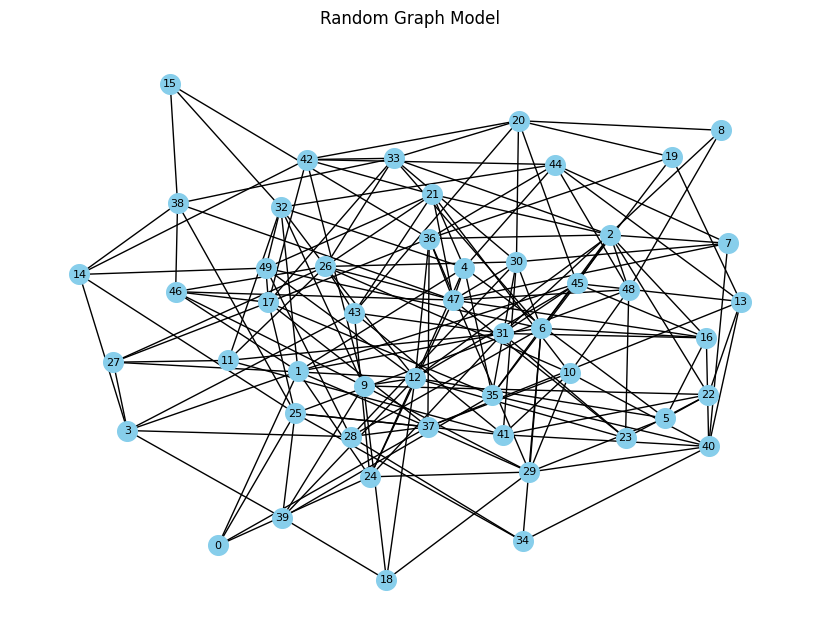

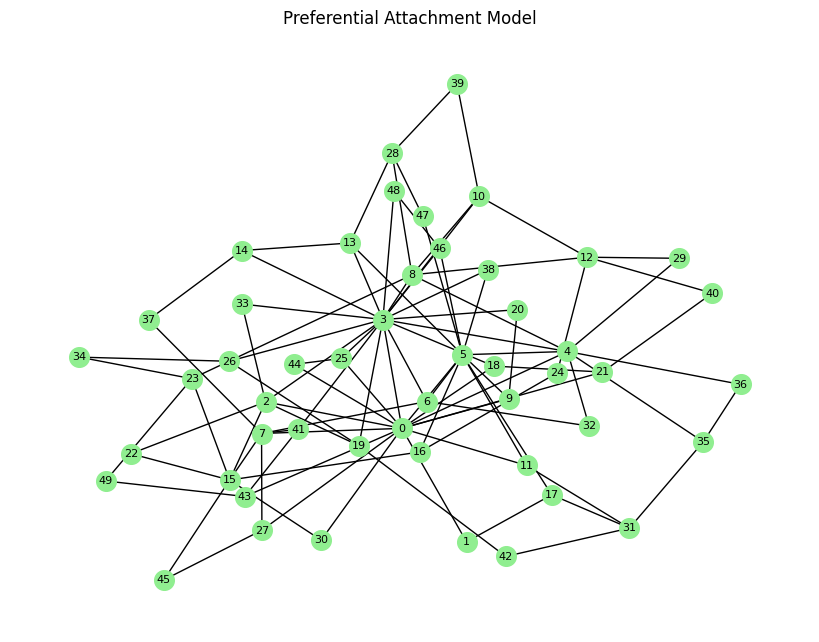

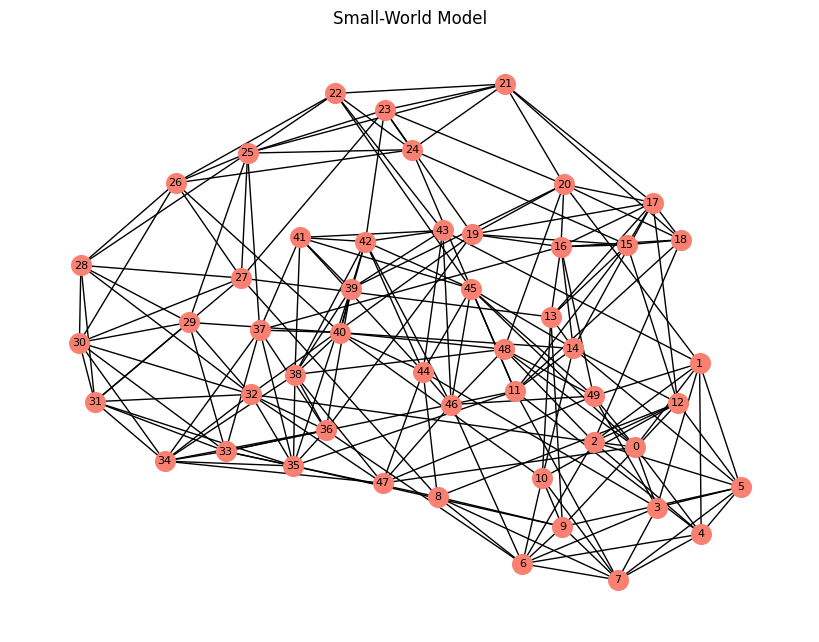

In [ ]:

random_graph = nx.erdos_renyi_graph(50, 0.15)  # Adjust the probability as needed

# Visualize the Random Graph Model
plt.figure(figsize=(8, 6))
nx.draw(random_graph, with_labels=True, node_color='skyblue', node_size=200, font_size=8)
plt.title('Random Graph Model')
plt.show()

# Create Preferential Attachment Model
preferential_graph = nx.barabasi_albert_graph(50, 2)  # Adjust the parameters as needed

# Visualize the Preferential Attachment Model
plt.figure(figsize=(8, 6))
nx.draw(preferential_graph, with_labels=True, node_color='lightgreen', node_size=200, font_size=8)
plt.title('Preferential Attachment Model')
plt.show()

# Create Small-World Model
small_world_graph = nx.watts_strogatz_graph(50, 8, 0.2)  # Adjust parameters (n, k, p) as needed

# Visualize the Small-World Model
plt.figure(figsize=(8, 6))
nx.draw(small_world_graph, with_labels=True, node_color='salmon', node_size=200, font_size=8)
plt.title('Small-World Model')
plt.show()